In [1]:
% matplotlib inline
from plot_setup import *
import model_definition as model
import seaborn as sns
#sns.set(style="ticks",palette="tab10")
sns.set_style('whitegrid')
sns.set_palette("tab10",10)
import matplotlib

#args_pairplot = {"size":5,"plot_kws":{"s":8,"marker":"o"},"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
args_pairplot = {"plot_kws":{"s":8,"marker":"o"},"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}

def mypairplot(
    mcchain,
    scatter_kws={"s":1,"marker":"o","alpha":0.1},
    kde_kws={"shade":True,"shade_lowest":False,"cmap":"jet"},
    hist_kws={"bins":32,"histtype":"stepfilled","alpha":0.3},
    **kws):
    
    print("Note: The following warnings occur, but no problem.\nUserWarning: The following kwargs were not used by contour: 'label', 'color' ")
    g = sns.PairGrid(mcchain,**kws)
    g = g.map_upper(plt.scatter,**scatter_kws)
    g = g.map_lower(sns.kdeplot,**kde_kws)
    g = g.map_diag(plt.hist, **hist_kws)
    return g

# Create mocks from 1million mock

C:\Users\shun\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\shun\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


,Unnamed: 0,R,v
count,786069.000000,786069.000000,786069.000000
mean,499928.391846,87.350861,49.992245
std,288668.615526,47.534610,17.944254
min,1.000000,0.136362,0.001746
25%,250037.000000,49.468351,38.155367
50%,499829.000000,80.672486,49.996543
75%,749759.000000,120.649628,61.842166
max,999998.000000,199.999804,99.999893


,Unnamed: 0,R,v
count,150033.000000,150033.000000,150033.000000
mean,498702.369699,133.202363,53.050842
std,288424.480979,46.999852,28.668824
min,3.000000,0.877487,0.000645
25%,248553.000000,100.021827,28.755536
50%,497889.000000,141.203850,54.466748
75%,748292.000000,172.890237,78.083807
max,999985.000000,199.999290,99.999736


Note: The following warnings occur, but no problem.


C:\Users\shun\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


Note: The following warnings occur, but no problem.


C:\Users\shun\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


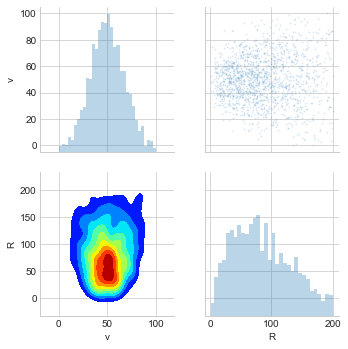

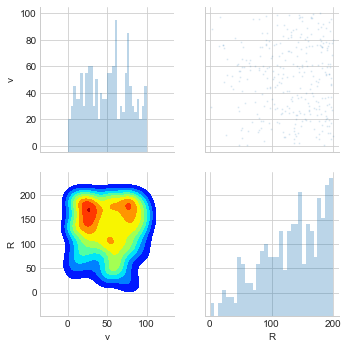

In [6]:
raw_mem = pd.read_csv("mock_mem_noMCMC_v001_1milion.csv")
raw_fg = pd.read_csv("mock_fg_noMCMC_v001_1milion.csv")
isin_RoI = lambda df: (df.R <= 200).values * (df.v >= 0).values * (df.v <= 100) 
mem = raw_mem[isin_RoI(raw_mem)]
fg = raw_fg[isin_RoI(raw_fg)]
display(mem.describe())
display(fg.describe())
display(mypairplot(mem[::500],vars=("v","R")))
display(mypairplot(fg[::500],vars=("v","R")))

In [13]:
n_sample = 2500
n_mock = 50
mems = [mem[i*n_sample:(i+1)*n_sample] for i in range(n_mock)]
fgs = [fg[i*n_sample:(i+1)*n_sample] for i in range(n_mock) ]
tots = [pd.DataFrame()]*n_mock
for i in range(n_mock):
    mems[i]["kind"] = "mem"
    fgs[i]["kind"] = "fg"
    tots[i] = mems[i].append(fgs[i],ignore_index=True)

C:\Users\shun\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\shun\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Note: The following warnings occur, but no problem.


C:\Users\shun\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


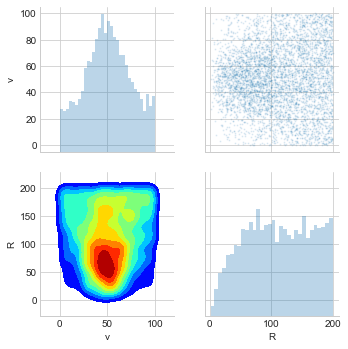

In [19]:
mypairplot(tots[-1],vars=("v","R"))

In [20]:
#export dfs
fnames = ["mock_tot_noMCMC_v001_" + str(i) + ".csv" for i in range(n_mock)]
[df.to_csv(fname) for df,fname in zip(tots,fnames)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]